In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Removing NAN values

In [114]:
#find nan value features.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
#Remove null values for embarked. Since there are 2 values, 
#I will replace with most frequent value in feature.
frequent_value = df['Embarked'].value_counts().sort_values(ascending = False).index[0]
df['Embarked']= np.where(df['Embarked'].isnull(), frequent_value, df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
# Remove NAN value of Age Feature.
median = df['Age'].median()
df['Age_median'] = np.where(df['Age'].isnull(), median, df['Age'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


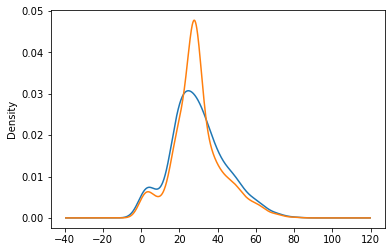

In [117]:
df['Age'].plot(kind = 'kde')
df['Age_median'].plot(kind = 'kde')
plt.show()

In [118]:
random_list = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)
df['Age_random'] = df['Age']
random_list.index = df[df['Age'].isnull()].index
df.loc[df['Age_random'].isnull(), 'Age_random'] =random_list
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


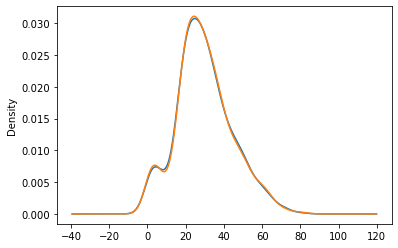

In [119]:
df['Age'].plot(kind='kde')
df['Age_random'].plot(kind='kde')
plt.show()

<AxesSubplot:xlabel='Age_random'>

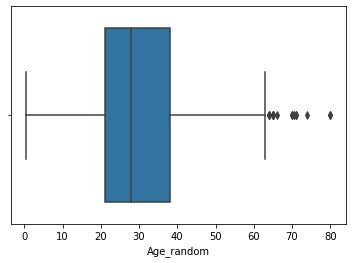

In [120]:
# I will drop Age, Age_median column
sns.boxplot(x = 'Age_random', data =df) # There are lot of outliers

In [121]:
df.drop(['Age', 'Age_median'], axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [122]:
#Removing null values of Cabin
len(df['Cabin'].unique()) #there are 148 unique labels, so label nan as whole different new label.
df['Cabin'].fillna('Missing', inplace= True)

#### Encoding Techniques.

In [123]:
#Sex feature.
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

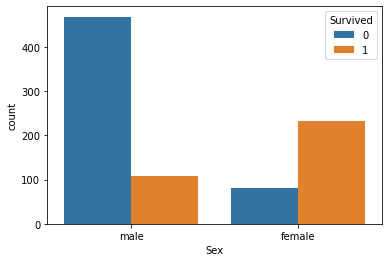

In [124]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [125]:
# convert male and female to 0 and 1
dict_sex = {'male': 0 , 'female': 1}
df['Sex']= df['Sex'].map(dict_sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,Missing,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,Missing,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,Missing,S,35.0


In [126]:
#embarked encoding
df['Embarked'].value_counts()
dict_embarked = df.groupby(['Embarked'])['Survived'].mean().index
dict_embarked= {k:i for i,k in enumerate(dict_embarked, 0)}
df['Embarked'] = df['Embarked'].map(dict_embarked)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

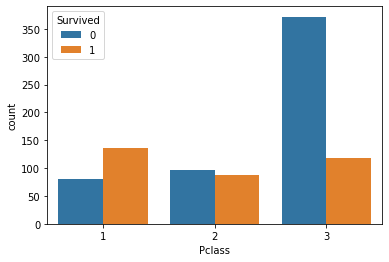

In [127]:
#pclass 
sns.countplot(x='Pclass', hue='Survived', data=df)

In [128]:
df.groupby(['Pclass'])['Survived'].mean()
# Survival rate 1>2>3.

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [129]:
#Convert Name into integers based on title.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\. ')
df['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Jonkheer      1
Capt          1
Lady          1
Countess      1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [130]:
df['Title'].replace(['Ms', 'Mme', 'Countess','Lady', 'Dr','Mlle', 'Miss'], 'Mrs', inplace =True)
df['Title'].replace(['Jonkheer','Capt','Don', 'Sir','Col','Rev', 'Major'], 'Mr', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,Missing,2,22.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,0,38.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,Missing,2,26.0,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,2,35.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,Missing,2,35.0,Mr


In [131]:
df['Title'].value_counts()
Dict_title = {'Mr': 0, 'Mrs': 1, 'Master': 2}
df['Title'] = df['Title'].map(Dict_title)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,Missing,2,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,C85,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,Missing,2,26.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,C123,2,35.0,1
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,Missing,2,35.0,0


In [132]:
df.drop(['Name'], axis=1, inplace=True)

In [133]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,Title
0,1,0,3,0,1,0,A/5 21171,7.2500,Missing,2,22.0,0
1,2,1,1,1,1,0,PC 17599,71.2833,C85,0,38.0,1
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,Missing,2,26.0,1
3,4,1,1,1,1,0,113803,53.1000,C123,2,35.0,1
4,5,0,3,0,0,0,373450,8.0500,Missing,2,35.0,0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

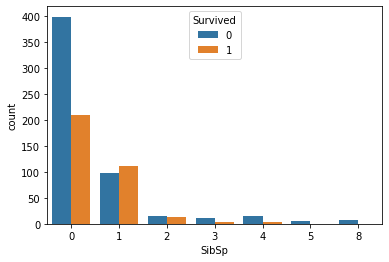

In [134]:
sns.countplot(x='SibSp', hue = 'Survived', data =df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

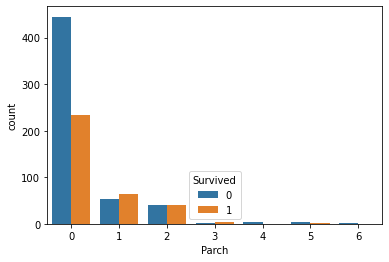

In [135]:
sns.countplot(x='Parch', hue = 'Survived', data=df)

In [136]:
#cabin values encoding
df['Cabin']= df['Cabin'].str[0]
ordinal_cabin_values = df.groupby(['Cabin'])['Survived'].mean().sort_values(ascending =False).index
dict_cabin = {k:i for i,k in enumerate(ordinal_cabin_values, 0)}
df['Cabin'] = df['Cabin'].map(dict_cabin)

In [137]:
#Ticket encoding
df.drop(['Ticket'], axis=1, inplace=True)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

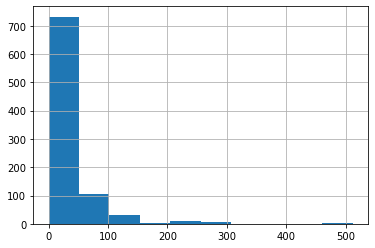

In [138]:
df['Fare'].hist(bins=10)
df['Fare'].value_counts()

In [139]:
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_random,Title
0,0,3,0,1,0,7.2500,7,2,22.0,0
1,1,1,1,1,0,71.2833,4,0,38.0,1
2,1,3,1,0,0,7.9250,7,2,26.0,1
3,1,1,1,1,0,53.1000,4,2,35.0,1
4,0,3,0,0,0,8.0500,7,2,35.0,0


In [151]:
#Perform linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [152]:
X = df.iloc[:, 1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [153]:
X_train.shape
X_test.shape

(268, 9)

In [158]:
y_test.value_counts()

0    178
1     90
Name: Survived, dtype: int64

In [171]:
lregressor = LogisticRegression()
lregressor.fit(X_train, y_train)

C:\Users\kandr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
y_pred = lregressor.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [168]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
matrix=confusion_matrix(y_test,y_pred)
matrix

0.8731343283582089


array([[164,  14],
       [ 20,  70]], dtype=int64)